# Sapore DiVino

Sapore DiVino è un progetto di Machine Learning che ha l'obiettivo di studiare le caratteristiche dei vini e classificare ciascuno di essi se è di qualita o meno

Inizio con l'importazione delle varie librerie che mi serviranno con l'intero sviluppo del progetto

In [1507]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Dopodiché leggo il dataset preso da Kaggle 

In [1508]:
dataset = pd.read_csv('winequality-red.csv')

dataset.sample(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1467,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4
1218,8.2,0.40,0.31,1.9,0.082,8.0,24.0,0.99600,3.24,0.69,10.6,6
1512,6.4,0.79,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,6
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,6
934,6.6,0.61,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
1148,7.8,0.39,0.42,2.0,0.086,9.0,21.0,0.99526,3.39,0.66,11.6,6
1117,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
943,9.8,0.50,0.34,2.3,0.094,10.0,45.0,0.99864,3.24,0.60,9.7,7


Notiamo che sono tutti dati numerici, più nello specifico 11 caratteristiche sono di tipo float e quality di tipo intero.

# Data Understanding

La fase di Data Understanding aiuta a capire la natura del dataset, la sua struttura e le caratteristiche delle variabili presenti.

Ottengo ulteriori informazioni sul dataset, stampando le righe e le colonne

In [1509]:
dataset.shape

(1599, 12)

Vado a studiarmi più nel dettaglio alcune delle caratteristiche del dataset, come ad esempio il numero di vini che hanno una determinata qualità

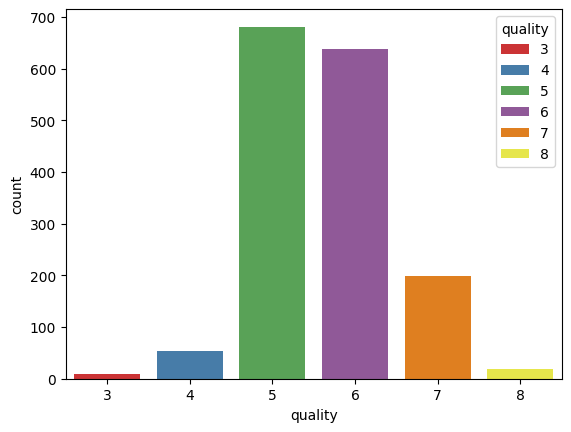

In [1510]:
sns.countplot(x='quality', data=dataset, palette='Set1', hue="quality")
plt.show()

Notiamo che la moda della qualità è dato dal valore 5

Di seguito la gradazione di alcol

<Axes: xlabel='quality', ylabel='alcohol'>

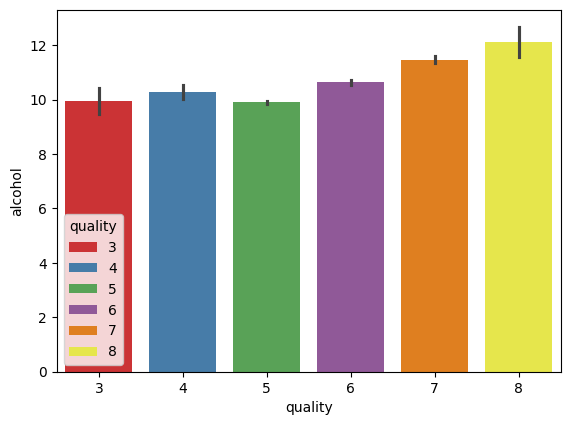

In [1511]:
fig = plt.figure(figsize = (6.5,4.7))
sns.barplot(x = 'quality', data=dataset, y = 'alcohol', palette='Set1', hue="quality")

Dal grafico si piò notare che al crescere della qualità aumenta anche quella che è la gradazione alcolica

Inizio a semplificarmi il lavoro, contando i vini che hanno qualità <6 e i vini che hanno qualità >=6; di seguito anche il grafico

In [1512]:
print('Vini che hanno una qualità insufficiente: ', len(dataset[(dataset['quality'] < 6)]))
print('Vini che hanno una qualità sufficiente: ',len(dataset[(dataset['quality'] >= 6)]))

Vini che hanno una qualità insufficiente:  744
Vini che hanno una qualità sufficiente:  855


Notiamo che i vini con una qualità insufficiente sono 744, mentre i vini con una qualità sufficiente sono ben 855. Deduciamo che la maggior parte dei vini nel dataset siano di qualità.

Scelgo di effettuare una sostituzione all'interno della caratteristica 'quality': se il vino ha una qualità che è <6 allora la votazione sarà sostituita dal valore 0; mentre se il vino ha una qualità che è >=6 allora la votazione sarà sostituito dal valore 1. Tutto ciò è giustificato dal fatto che effettuando una classificazione binaria, i dati possono essere usati come input per algoritmi di Machine Learning.

In [1513]:
dataset['quality'] = dataset['quality'].apply(lambda x: 1 if x >= 6 else 0)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Stampiamo a video le qualità dei vini utilizzando un grafico a torta.

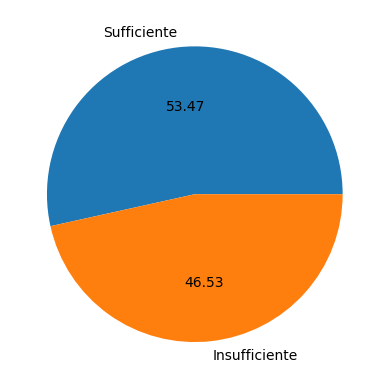

In [1514]:
plt.pie(dataset['quality'].value_counts(), labels=['Sufficiente', 'Insufficiente'], autopct="%0.2f")
plt.show()

Anche qui è evidente che la maggior parte dei vini siano di qualità, rendendo però così sbilanciato il dataset ma su questo argomento ci torneremo in seguito.

# Data Cleaning

La fase di Data Cleaning è il processo di identificazione, correzione o rimozione di errori e inconsistenze nei dati al fine di migliorarne la qualità e renderli adatti all'analisi o all'utilizzo in modelli di Machine Learning.

Controlliamo che all'interno del dataset non ci siano intere colonne con un valore nullo.

In [1515]:
dataset.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

Controllo se sono presenti valori nulli

In [1516]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Non sono presenti valori nulli all'interno del dataset.

Verifico di seguito se esistono duplicati

In [1517]:
duplicati_totali = dataset.duplicated().sum()
duplicati_totali

240

Sono presenti ben 240 duplicati, procedo a rimuoverli

In [1518]:
dataset = dataset.drop_duplicates()

Controllo che il valore dei duplicati sia uguale a 0

In [1519]:
dataset.duplicated().sum()

0

In [1520]:
print('DOPO LA RIMOZIONE DEI DUPLICATI\n')

print('Vini con qualità insufficiente: ', len(dataset[(dataset['quality'] == 0)]))
print('Vini con qualità sufficiente: ', len(dataset[(dataset['quality'] == 1)]))

DOPO LA RIMOZIONE DEI DUPLICATI

Vini con qualità insufficiente:  640
Vini con qualità sufficiente:  719


# Feature Scaling

Il Feature Scaling è una tecnica utilizzata nell'ambito del Machine Learning e delle analisi statistiche per normalizzare o standardizzare le diverse caratteristiche o variabili di un dataset.

In [1521]:
#VERSIONE PRECEDENTE CORRETTA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

X = dataset.drop(['quality'], axis = 1)
Y = dataset['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Elementi composti dal training set: ',len(X_train))
print('Elementi composti dal test set: ',len(X_test))

Elementi composti dal training set:  951
Elementi composti dal test set:  408


In [1522]:
#VERSIONE PRECEDENTE CORRETTA
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler 

#X = dataset.drop('quality', axis = 1)
#Y = dataset['quality']

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#print('Elementi composti dal training set: ',len(X_train))
#print('Elementi composti dal test set: ',len(X_test))

# Feature Selection

La Feature Selection è il processo di scegliere un sottoinsieme rilevante di variabili (feature o caratteristiche) da utilizzare per costruire un modello o analizzare dati.

Vado a stamparmi quella che è la matrice delle correlazioni così da avere una panoramica generale delle correlazioni sulle caratteristiche del dataset.

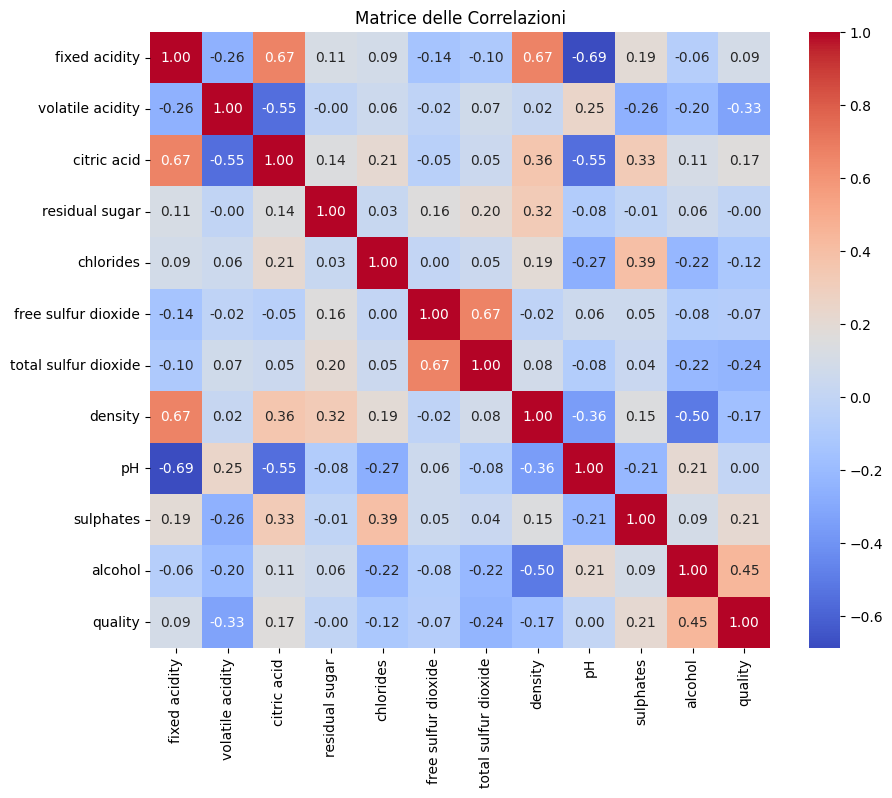

In [1523]:
# Calcola la matrice delle correlazioni
correlation_matrix = dataset.corr()
#Visualizza la matrice delle correlazioni come una heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice delle Correlazioni")
plt.show()

In [1524]:
#eliminiamo le colonne correlate
#columns_to_drop = ['residual sugar','volatile acidity','free sulfur dioxide','chlorides', 'pH']

# Utilizza il metodo drop per eliminare le colonne specificate
#dataset = dataset.drop(columns=columns_to_drop, axis=1) #axis=1 vuol dire colonne, axis=0 righe
#print(dataset.head())

In [1525]:
# Calcola la matrice delle correlazioni
#correlation_matrix = dataset.corr()

# Visualizza la matrice delle correlazioni come una heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Matrice delle Correlazioni")
#plt.show()

In generale, notiamo che tra le caratteristiche del problema non ci sono forti correlazioni. Ma possiamo notare anche che:
    
    - *citric acid* e *fixed acidity* sono ben correlate
    - *density* e *fixed acidity* sono ben correlate
    - *total sulfur dioxide* e *free sulfur dioxide* sono ben correlate

# Data Balancing


Il Data Balancing è una pratica utilizzata nell'ambito dell'apprendimento automatico e dell'analisi dei dati per affrontare il problema delle classi sbilanciate.

Come detto in precedenza, abbiamo un numero di classi maggiore di vini con qualità almeno sufficiente rispetto a quelli che sono insufficienti; quindi il nostro dataset è sbilanciato, come mostra il grafico di seguito

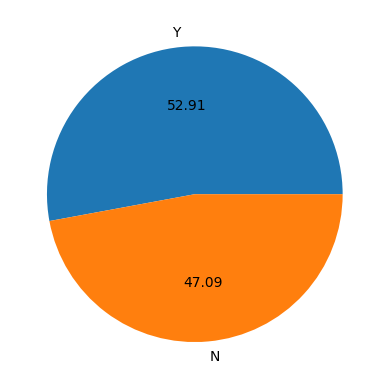

In [1526]:
plt.pie(dataset['quality'].value_counts(), labels=['Y', 'N'], autopct="%0.2f")
plt.show()

Per poter affrontare al meglio il problema Data Balancing, mi rimangono due opzioni:

    -  Undersampling, ovvero ridurre il numero di campioni della classe maggioritaria fino a raggiungere un equilibrio con le classi minoritarie.
    -  Oversampling, ovvero aumentare il numero di campioni della classe minoritaria fino a raggiungere un equilibrio con le classi maggioritarie.

Tra le due, ho scelto di utilizzare la tecnica dell'undersampling

In [1527]:
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split


lab_enc = preprocessing.LabelEncoder()
encoded_train_Y = lab_enc.fit_transform(Y_train)

rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus= rus.fit_resample(X_train, encoded_train_Y)

print(sorted(Counter(y_train_rus).items()))

[(0, 450), (1, 450)]


In [1528]:
#VERSIONE PRECEDETNTE CORRETTA

#from sklearn import preprocessing
#from imblearn.under_sampling import RandomUnderSampler
#from collections import Counter

#lab_enc = preprocessing.LabelEncoder()
#encoded_train_Y = lab_enc.fit_transform(Y_train)

#rus = RandomUnderSampler(random_state=42)

#X_train_rus, y_train_rus= rus.fit_resample(X_train, encoded_train_Y)

#print(sorted(Counter(y_train_rus).items()))

# Data Model

# Naive Bayes

Gli algoritmi di Naive Bayes sono algoritmi di apprendimento supervisionato basati sull'applicazione del teorema matematico di Bayes, con la'assunzione "ingenua" di indipendenza tra ogni coppia di caratteristiche. 

Esistono diversi tipi di algoritmi di Bayes:

    - Gaussian Naive Bayes Algorithm
    - Multinomial Naive Bayes Algorithm
    - Bernoulli Naive Bayes Algorithm
    - Complement Naive Bayes Algorithm

In [1529]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
cmplnb = ComplementNB()


Scriviamo il codice riguardante il Gaussian Naive Bayes

In [1530]:
gnb.fit(X_train_rus, y_train_rus) #training 
y_pred = gnb.predict(X_test) #testing


Stampo quelli che sono i valori dell'accuracy, precision, recall, F1 score e MCC

In [1531]:
accuracyGNB = accuracy_score(Y_test,y_pred)
precisionGNB = precision_score(Y_test,y_pred)
recallGNB = recall_score(Y_test,y_pred)
f1_scoreGNB = f1_score(Y_test, y_pred)

print('Accuracy: ' , accuracyGNB)
print('Precision: ' , precisionGNB)
print('Recall: ' , recallGNB)
print('F1 score: ', f1_scoreGNB)


Accuracy:  0.7573529411764706
Precision:  0.7931034482758621
Recall:  0.7385321100917431
F1 score:  0.7648456057007127


Introduciamo la matrice di confusione

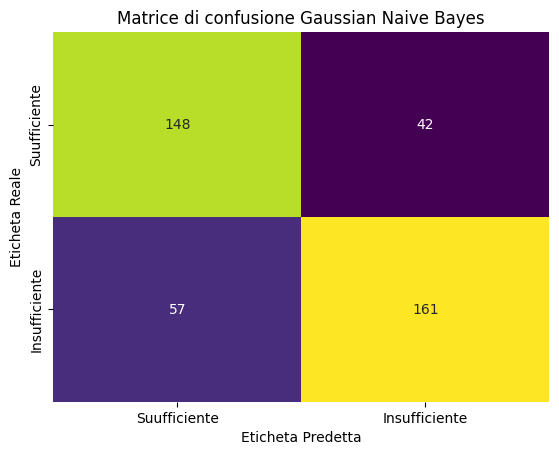

In [1532]:
labels=['Suufficiente', 'Insufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di confusione Gaussian Naive Bayes')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

Procediamo con Multinomial Naive Bayes

Accuracy:  0.7377450980392157
Precision:  0.7846153846153846
Recall:  0.7018348623853211
F1 score:  0.7409200968523002


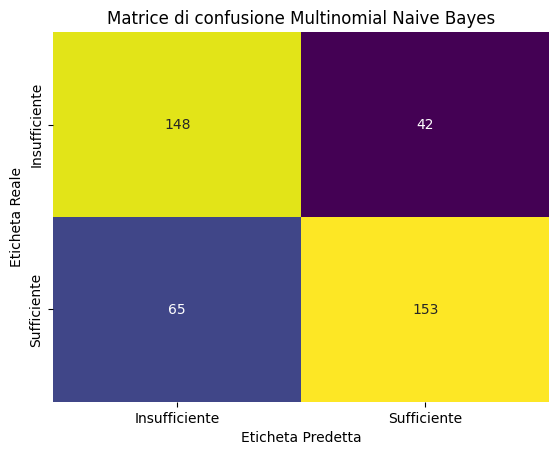

In [1533]:
mnb.fit(X_train_rus, y_train_rus) 
y_pred_2 = mnb.predict(X_test) 

accuracyMNB = accuracy_score(Y_test,y_pred_2)
precisionMNB = precision_score(Y_test,y_pred_2)
recallMNB = recall_score(Y_test,y_pred_2)
f1_scoreMNB = f1_score(Y_test, y_pred_2)
print('Accuracy: ' , accuracyMNB)
print('Precision: ' , precisionMNB)
print('Recall: ' , recallMNB)
print('F1 score: ', f1_scoreMNB)


labels=['Insufficiente', 'Sufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred_2)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di confusione Multinomial Naive Bayes')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

Procediamo con Bernoulli Naive Bayes

Accuracy:  0.5416666666666666
Precision:  0.5417789757412399
Recall:  0.9220183486238532
F1 score:  0.6825127334465196


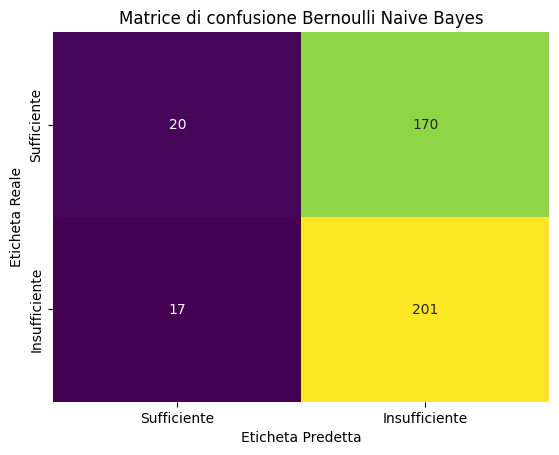

In [1534]:
bnb.fit(X_train_rus,y_train_rus) 
y_pred_3 = bnb.predict(X_test) 

accuracyBNB = accuracy_score(Y_test,y_pred_3)
precisionBNB = precision_score(Y_test,y_pred_3)
recallBNB = recall_score(Y_test,y_pred_3)
f1_scoreBNB = f1_score(Y_test, y_pred_3)
print('Accuracy: ' , accuracyBNB)
print('Precision: ' , precisionBNB)
print('Recall: ' , recallBNB)
print('F1 score: ', f1_scoreBNB)


labels=['Sufficiente', 'Insufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred_3)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di confusione Bernoulli Naive Bayes')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

# Decision Tree

I Decision Tree, o alberi decisionali, sono un tipo di modello di Machine Learning utilizzato per compiere decisioni basate su una serie di regole decisionali. Questi algoritmi sono ampiamente utilizzati sia per problemi di classificazione, come in questo caso

Accuracy:  0.7132352941176471
Precision:  0.7044534412955465
Recall:  0.7981651376146789
F1 score:  0.7483870967741936


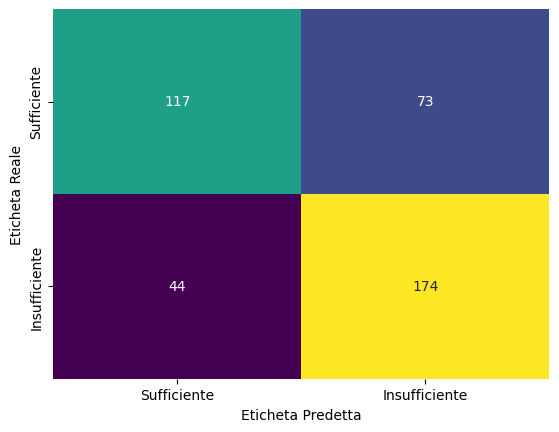

In [1535]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3)

dtc.fit(X_train_rus,y_train_rus)
y_pred = dtc.predict(X_test)
accuracyDTC = accuracy_score(Y_test,y_pred)
precisionDTC = precision_score(Y_test,y_pred)
recallDTC = recall_score(Y_test,y_pred)
f1_scoreDTC = f1_score(Y_test, y_pred)

print('Accuracy: ' , accuracyDTC)
print('Precision: ' , precisionDTC)
print('Recall: ' , recallDTC)
print('F1 score: ', f1_scoreDTC)

labels = ['Sufficiente', 'Insufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
#plt.title('Matrice di Confusione')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

# Random Forest

Accuracy:  0.7524509803921569
Precision:  0.7623318385650224
Recall:  0.7798165137614679
F-score:  0.7709750566893423


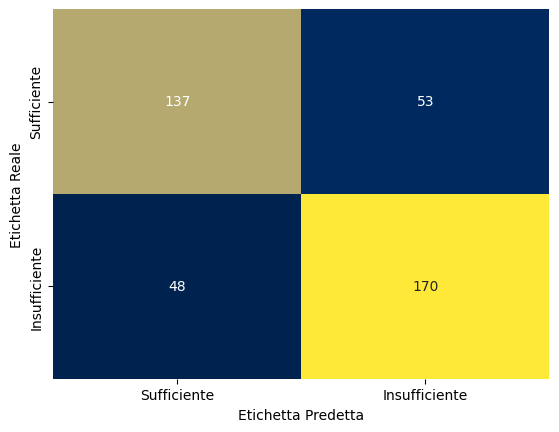

In [1536]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=84)

# Addestra il modello sul training set
rf.fit(X_train_rus, y_train_rus)

# Effettua previsioni sul test set
y_pred = rf.predict(X_test)

accuracyRF = accuracy_score(Y_test,y_pred)
precisionRF = precision_score(Y_test,y_pred)
recallRF = recall_score(Y_test,y_pred)
f1_scoreRF = f1_score(Y_test, y_pred)
print('Accuracy: ', accuracyRF)
print('Precision: ', precisionRF)
print('Recall: ', recallRF)
print('F-score: ', f1_scoreRF)

#print("Classification Report:")
#print(classification_report(y_test, y_pred))

labels = ['Sufficiente', 'Insufficiente']
confusion_matrix_result = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels, cbar=False)
#plt.title('Matrice di Confusione')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()

# Confronto tra metriche

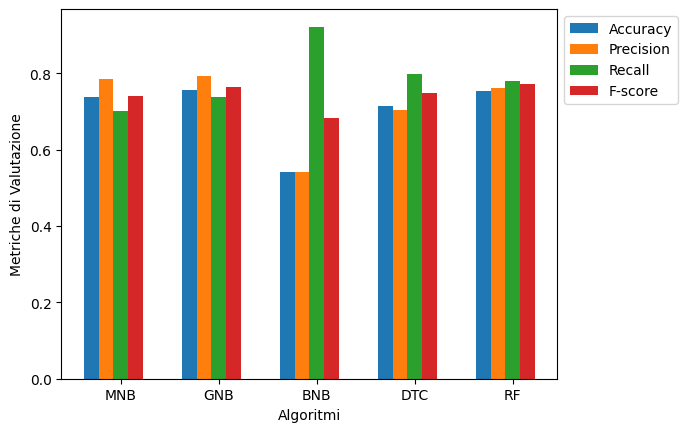

In [1537]:
import numpy as np
import matplotlib.pyplot as plt

class_labels = ['MNB', 'GNB', 'BNB', 'DTC', 'RF']
accuracy_results = [accuracyMNB, accuracyGNB, accuracyBNB ,accuracyDTC, accuracyRF]
precision_results = [precisionMNB, precisionGNB, precisionBNB, precisionDTC, precisionRF]
recall_results = [recallMNB, recallGNB, recallBNB, recallDTC, recallRF]
f1_results = [f1_scoreMNB, f1_scoreGNB, f1_scoreBNB, f1_scoreDTC, f1_scoreRF]

bar_width = 0.15

index = np.arange(len(class_labels))

plt.bar(index, accuracy_results, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_results, bar_width, label='Precision')
plt.bar(index + 2*bar_width, recall_results, bar_width, label='Recall')
plt.bar(index + 3*bar_width, f1_results, bar_width, label='F-score')

plt.xlabel('Algoritmi')
plt.ylabel('Metriche di Valutazione')
#plt.title('Confronto delle metriche di valutazione tra algoritmi')
plt.xticks(index + 2*bar_width, class_labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


Dal grafico possiamo trarre delle conclusioni:

    - La recall nel Bernoulli Naive Bayes ha il valore più alto rispetto a tutti gli altri algoritmi che ne fanno uso
    - L'algoritmo che possiede il valore delle metriche più equilibrato è quello utilizzato dal Gaussian Naive Bayes 

  Variante  Precisione    Recall  Accuratezza   F-score
0      MNB    0.784615  0.701835     0.737745  0.740920
1      GNB    0.793103  0.738532     0.757353  0.764846
2      BNB    0.541779  0.922018     0.541667  0.682513
3      DTC    0.704453  0.798165     0.713235  0.748387
4       RF    0.762332  0.779817     0.752451  0.770975


(0.0, 1.0, 0.0, 1.0)

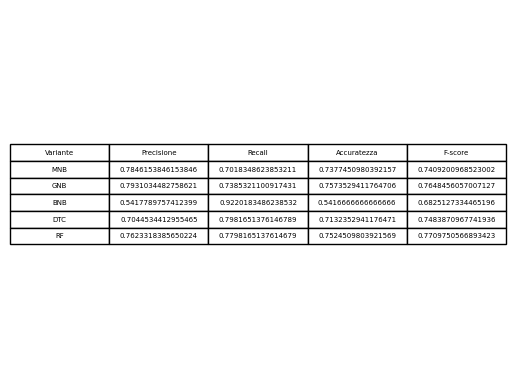

In [1538]:
#tabella delle metriche di valutazione ottenute, per ogni distribuzione

data = {
    'Variante': ['MNB', 'GNB', 'BNB', 'DTC', 'RF'],
    'Precisione': [precisionMNB, precisionGNB, precisionBNB, precisionDTC, precisionRF],
    'Recall':  [recallMNB, recallGNB, recallBNB, recallDTC, recallRF],
    'Accuratezza': [accuracyMNB, accuracyGNB, accuracyBNB ,accuracyDTC, accuracyRF],
    'F-score': [f1_scoreMNB, f1_scoreGNB, f1_scoreBNB, f1_scoreDTC, f1_scoreRF]
}

# Creazione del DataFrame
df = pd.DataFrame(data)

# Stampa del DataFrame
print(df)

# Creazione della tabella con matplotlib
plt.table(cellText=df.values,
          colLabels=df.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')  # Rimuovi gli assi

# Curva ROC e valore AUC

La curva ROC (Receiver Operating Characteristic) è uno strumento grafico utilizzato per valutare le prestazioni di un modello di classificazione binaria. La curva ROC visualizza la trade-off tra la sensibilità (tasso vero positivo) e la specificità (tasso vero negativo) del modello su vari soglia di decisione.

Ecco alcuni concetti chiave associati alla curva ROC:

    - Axe delle Ascisse (X): Tasso Falsi Positivi (FPR) - Questo rappresenta la proporzione di casi negativi erroneamente classificati come positivi rispetto al totale dei casi negativi.
    - Axe delle Ordinate (Y): Tasso Veri Positivi (TPR), o Sensibilità o Recall - Questo rappresenta la proporzione di casi positivi correttamente classificati come positivi rispetto al totale dei casi positivi.

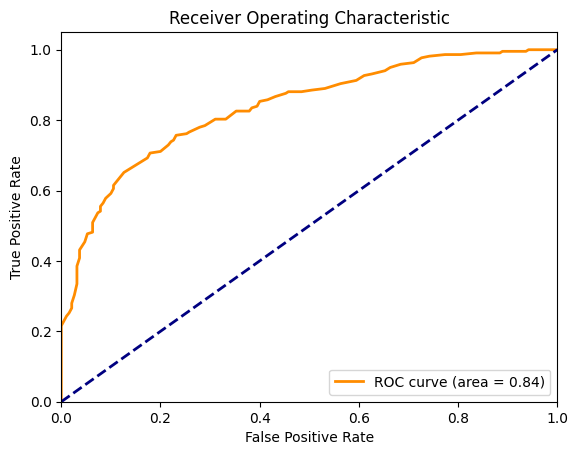

In [1539]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()